# Ground induced image current demo / test
Testing/demonstrating the implementation of ground induced image currents. The implementation is based on 
Juusola, L., Kauristie, K., Vanhamäki, H., Aikio, A., and van de Kamp, M. ( 2016), Comparison of auroral ionospheric and field‐aligned currents derived from Swarm and ground magnetic field measurements, J. Geophys. Res. Space Physics, 121, 9256– 9283, doi:10.1002/2016JA022961.



In [41]:
from secsy import utils
from importlib import reload
reload(utils)
import numpy as np
RE = 6371.2 # Earth radius
RI = RE + 100 # height of ionospheric currents
RC = RE - 500 # this is where the magnetic field is canceled by image currents

# the image currents will be located at
r0 = RC**2/RI

r = np.linspace(r0+1, RI-1, 100)

# set up some secs poles
lat_secs = np.array([70])#, 74, 70])
lon_secs = np.array([50])#, 60, 70])
I0 = np.array([2])#, -5, 3.5]) # amplitudes

# evaluation location:
lat = np.ones_like(r) * 72
lon = np.ones_like(r) * 50

Ge0, Gn0, Gr0 = utils.get_SECS_B_G_matrices(lat, lon, r, lat_secs, lon_secs, RI = RI)
Ge, Gn, Gr = utils.get_SECS_B_G_matrices(lat, lon, r, lat_secs, lon_secs, RI = RI, induction_nullification_radius = RC)

# magnetic field with no telluric current
Br0 = Gr0.dot(I0)
Be0 = Ge0.dot(I0)
Bn0 = Gn0.dot(I0)

# with telluric image current
Br = Gr.dot(I0)
Be = Ge.dot(I0)
Bn = Gn.dot(I0)

Text(0.5, 0, 'r [km]')

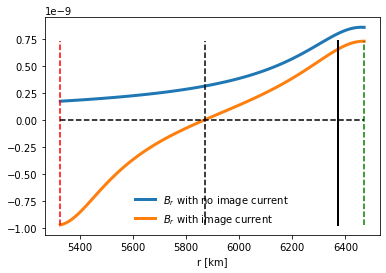

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(r, Br0, label = '$B_r$ with no image current', linewidth = 3)
plt.plot(r, Br, label = '$B_r$ with image current', linewidth = 3)
plt.plot([RI, RI], [Br.min(), Br.max()], 'g--')
plt.plot([RE, RE], [Br.min(), Br.max()], 'k-', linewidth = 2)
plt.plot([RC, RC], [Br.min(), Br.max()], 'k--')
plt.plot([RC**2/RI, RC**2/RI], [Br.min(), Br.max()], 'r--')
plt.plot(r[[0, -1]], [0, 0], 'k--')
plt.legend(frameon = False)
plt.xlabel('r [km]')
